# Beam size search

In [1]:
import json
import matplotlib.pyplot as plt
import os, re

In [2]:
# Lists to store beam sizes, scores, and brevity penalties
beam_sizes = []
scores = []
bps = []

# Loop over beam sizes
for beam_size in range(1, 26):
    translation_file_score = f"assignments/05/beam_search/translations_beam_{beam_size}_sb_score.txt"
    
    with open(translation_file_score, 'r') as file:
        data = json.load(file)
        
        # Extract score and brevity penalty
        bleu = data.get("score", 0.0)
        bp_match = re.search(r'BP = (\d+\.\d+)', data.get("verbose_score", ""))
        bp = float(bp_match.group(1)) if bp_match else 0.0
        
        beam_sizes.append(beam_size)
        scores.append(bleu)
        bps.append(bp)

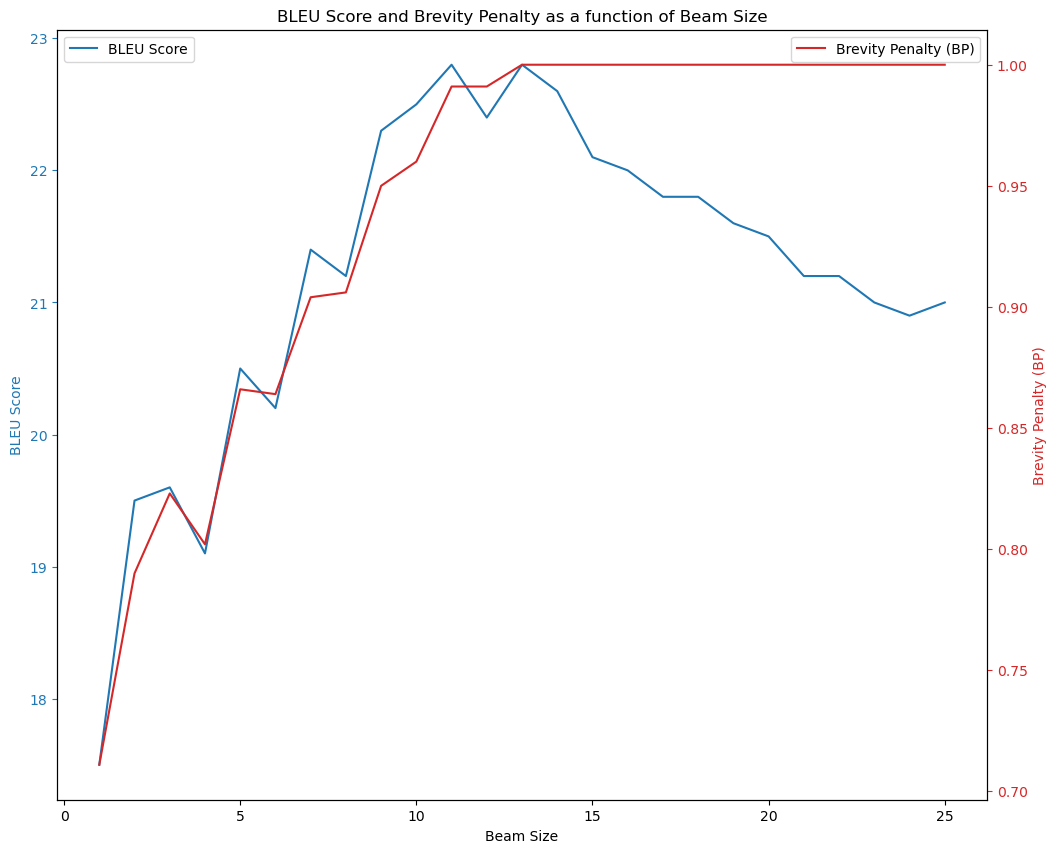

In [3]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 10))

color_blue = '#1f77b4'  # Nice shade of blue
ax1.plot(beam_sizes, scores, color_blue, label='BLEU Score')
ax1.set_xlabel('Beam Size')
ax1.set_ylabel('BLEU Score', color=color_blue)
ax1.tick_params('y', colors=color_blue)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color_red = '#d62728'  # Nice shade of red
ax2.plot(beam_sizes, bps, color_red, label='Brevity Penalty (BP)')
ax2.set_ylabel('Brevity Penalty (BP)', color=color_red)
ax2.tick_params('y', colors=color_red)
ax2.legend(loc='upper right')

plt.title('BLEU Score and Brevity Penalty as a function of Beam Size')
plt.savefig('assignments/05/beam_search/scores_bp.png', facecolor='w')

plt.show()


# UID 

In [4]:
import os
import re

# Define the folder and beam sizes
folder = "assignments/05/uid/"
beam_sizes = [5, 10, 15]
uid_size = [0.1, 0.3, 0.5, 0.7]

# Create dictionaries to store results
scores_by_beam_size = {beam_size: [] for beam_size in beam_sizes}
bps_by_beam_size = {beam_size: [] for beam_size in beam_sizes}

# Read BLEU scores from files
for beam_size in beam_sizes:
    for uid_value in uid_size:
        file_path = os.path.join(folder, f"translations_beam_{beam_size}_uid_{uid_value}_sb_score.txt")
        
        with open(file_path, "r", encoding="utf-8") as file:
            data = file.read()

            # Extract score and brevity penalty using regular expressions
            bleu_match = re.search(r'score": ([\d.]+),', data)
            bleu = float(bleu_match.group(1)) if bleu_match else 0.0

            bp_match = re.search(r'BP = (\d+\.\d+)', data)
            bp = float(bp_match.group(1)) if bp_match else 0.0

            # Append to lists for the current beam_size
            scores_by_beam_size[beam_size].append(bleu)
            bps_by_beam_size[beam_size].append(bp)

# Print or use the organized scores
for beam_size, scores in scores_by_beam_size.items():
    print(f"Beam Size {beam_size} Scores: {scores}")
    
for beam_size, bps in bps_by_beam_size.items():
    print(f"Beam Size {beam_size} Brevity Penalties: {bps}")

Beam Size 5 Scores: [21.4, 20.6, 20.4, 20.2]
Beam Size 10 Scores: [19.8, 17.7, 17.5, 17.3]
Beam Size 15 Scores: [16.3, 14.3, 13.4, 12.8]
Beam Size 5 Brevity Penalties: [0.932, 0.942, 0.939, 0.944]
Beam Size 10 Brevity Penalties: [1.0, 1.0, 1.0, 1.0]
Beam Size 15 Brevity Penalties: [1.0, 1.0, 1.0, 1.0]


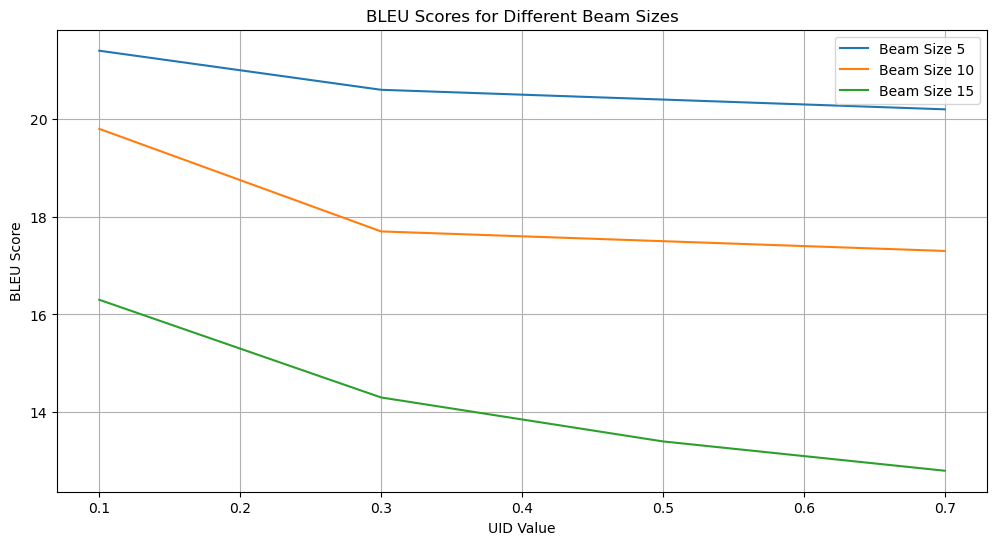

In [5]:
import matplotlib.pyplot as plt

# Plot scores
plt.figure(figsize=(12, 6))
for beam_size, scores in scores_by_beam_size.items():
    plt.plot(uid_size, scores, label=f"Beam Size {beam_size}")

plt.title("BLEU Scores for Different Beam Sizes")
plt.xlabel("UID Value")
plt.ylabel("BLEU Score")
plt.legend()
plt.grid(True)
plt.show()